# Import packages and setup data

In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.preprocessing import *
import datetime as dt
start=dt.datetime.now()
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:00.000080


In [2]:
# load data
df = pd.read_csv('EDA_data.csv')

In [4]:
# data preview
print(df.shape)
df.head()

(129487, 24)


,Unnamed: 0,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,...,Online_support,Ease_of_Online_booking,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,0,1,1,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,2,1,1,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,3,1,1,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,4,1,1,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
# basic data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 24 columns):
Unnamed: 0                           129487 non-null int64
satisfaction                         129487 non-null int64
Gender                               129487 non-null int64
Customer_Type                        129487 non-null object
Age                                  129487 non-null int64
Type_of_Travel                       129487 non-null object
Class                                129487 non-null object
Flight_Distance                      129487 non-null int64
Seat_comfort                         129487 non-null int64
Departure/Arrival_time_convenient    129487 non-null int64
Food_and_drink                       129487 non-null int64
Gate_location                        129487 non-null int64
Inflight_wifi_service                129487 non-null int64
Inflight_entertainment               129487 non-null int64
Online_support                       129487 non-null int64
E

In [6]:
df.head()

,Unnamed: 0,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,...,Online_support,Ease_of_Online_booking,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,0,1,1,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,2,1,1,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,3,1,1,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,4,1,1,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [7]:
# assign numerical map to categorical data
for col in df.select_dtypes(include='O').columns:
    l=LabelEncoder()
    df[f'{col}_num']=l.fit_transform(df[col])

In [8]:
df.head()

,Unnamed: 0,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,...,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Customer_Type_num,Type_of_Travel_num,Class_num
0,0,1,1,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,0,3,5,3,2,0,0.0,0,1,1
1,1,1,0,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,4,4,2,3,2,310,305.0,0,1,0
2,2,1,1,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,3,4,4,4,2,0,0.0,0,1,1
3,3,1,1,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,0,1,4,1,3,0,0.0,0,1,1
4,4,1,1,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,0,2,4,2,5,0,0.0,0,1,1


In [10]:
# quick note: Eco class is 1, business is 0, and eco+ is 2
# 0 is loyal customer and 1 is disloyal
# 1 is personal travel and 0 is work I guess

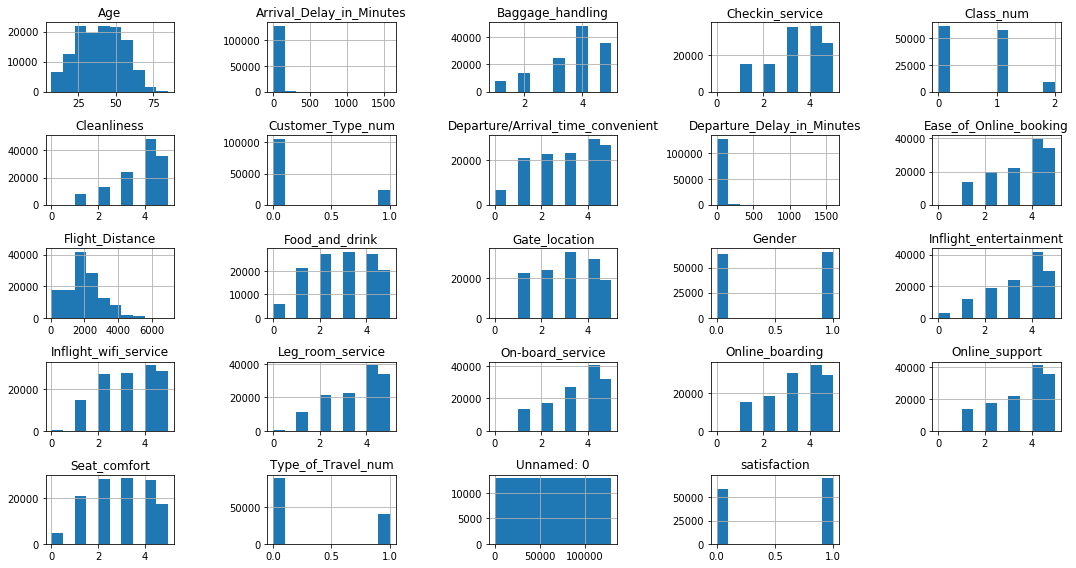

In [13]:
# histograms to look for binning opportunities

df.hist(figsize=(15,8))
plt.tight_layout()
plt.show()

In [15]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [23]:
pd.qcut(df.Age,q=4).value_counts()

(6.999, 27.0]    33671
(27.0, 40.0]     33394
(40.0, 51.0]     31527
(51.0, 85.0]     30895
Name: Age, dtype: int64

In [ ]:
df['age_bin'] = pd.split(df.age)